In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from datasets import load_dataset

ds = load_dataset("yonigozlan/wikiart-tiny")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/5.73k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/459M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [ ]:
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'artist', 'genre', 'style'],
        num_rows: 1000
    })
})

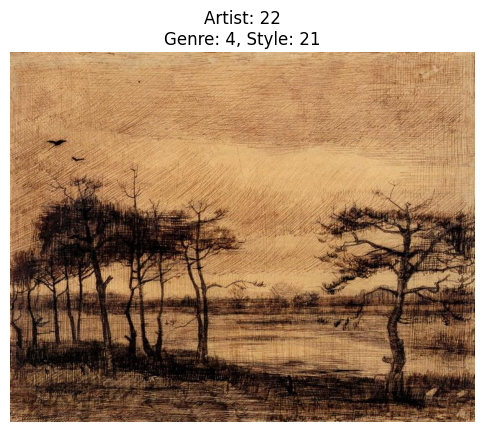

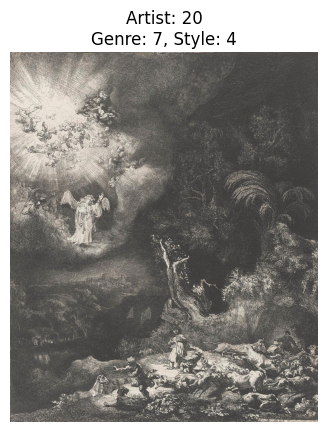

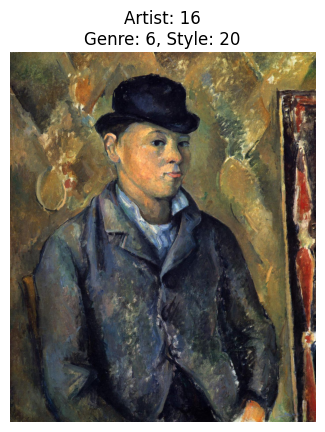

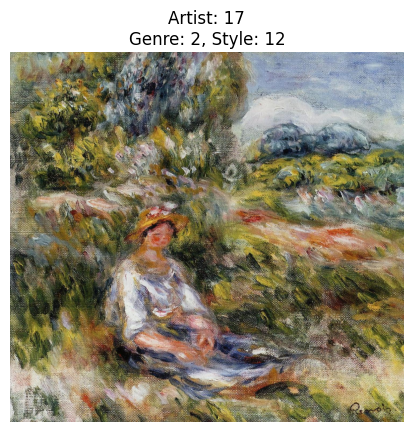

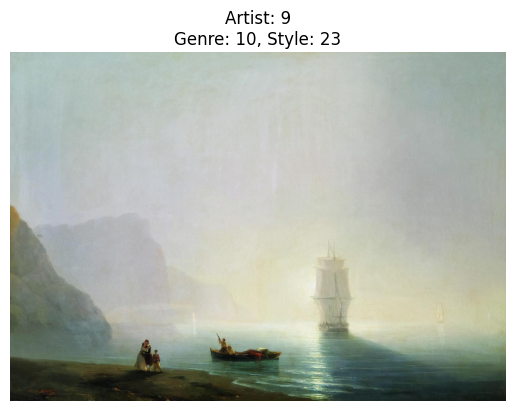

In [ ]:
from datasets import DatasetDict
import matplotlib.pyplot as plt

# Assuming you already have your DatasetDict object loaded as `dataset`
# Display a few images from the dataset

def show_samples(dataset, num_samples=5):
    # Select the 'train' split
    train_dataset = dataset['train']

    # Display specified number of samples
    for i in range(num_samples):
        sample = train_dataset[i]

        # Retrieve image and labels
        image = sample['image']
        artist = sample['artist']
        genre = sample['genre']
        style = sample['style']

        # Plot the image with the metadata as title
        plt.imshow(image)
        plt.axis("off")
        plt.title(f"Artist: {artist}\nGenre: {genre}, Style: {style}")
        plt.show()

# Usage example
# Show 5 sample images from the dataset
show_samples(ds, num_samples=5)


1-cityscape
<br>2-genre-painting
<br>3-illustration
<br>4-landsacpe
<br>5-nude-painting
<br>6-portrait
<br>7-religious-painting
<br>8-sketch and study
<br>9-still-life
<br>10-unknown-genre

In [ ]:
from collections import Counter

# Assuming your dataset is named 'dataset'
unique_genres = ds['train'].unique('genre')
print("Unique genres:", unique_genres)


Unique genres: [4, 7, 6, 2, 10, 9, 8, 3, 1, 5]


In [ ]:
unique_genres = ds['train'].unique('style')
print("Unique genres:", unique_genres)

Unique genres: [21, 4, 20, 12, 23, 3, 17, 24, 15, 9, 7, 10, 2, 0, 25, 18]


In [ ]:
# Count the occurrences of each genre
genre_counts = Counter(ds['train']['genre'])
print("Genre counts:", genre_counts)


Genre counts: Counter({4: 225, 10: 152, 6: 145, 2: 131, 8: 107, 7: 64, 1: 63, 9: 46, 3: 39, 5: 28})


In [ ]:
emotion_label_mapping = {
    "calm": 0,
    "joyful": 1,
    "curious": 2,
    "intimate": 3,
    "thoughtful": 4,
    "spiritual": 5,
    "neutral": 6  # Add 'neutral' for unmapped genres if needed
}

In [ ]:
genre_to_emotion = {
    1: emotion_label_mapping["calm"],         # cityscape
    2: emotion_label_mapping["joyful"],       # genre-painting
    3: emotion_label_mapping["curious"],      # illustration
    4: emotion_label_mapping["calm"],         # landscape
    5: emotion_label_mapping["intimate"],     # nude-painting
    6: emotion_label_mapping["thoughtful"],   # portrait
    7: emotion_label_mapping["spiritual"],    # religious-painting
    8: emotion_label_mapping["curious"],      # sketch and study
    9: emotion_label_mapping["calm"],         # still-life
    10: emotion_label_mapping["neutral"]      # unknown-genre
}

In [ ]:
def map_genre_to_numeric_emotion(example):
    example["emotion"] = genre_to_emotion.get(example["genre"], emotion_label_mapping["neutral"])
    return example

In [ ]:
ds['train'] = ds['train'].map(map_genre_to_numeric_emotion)

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [ ]:
ds


DatasetDict({
    train: Dataset({
        features: ['image', 'artist', 'genre', 'style', 'emotion'],
        num_rows: 1000
    })
})

In [ ]:
ds.save_to_disk("content/drive/MyDrive/wikiart_emotions")

Saving the dataset (0/1 shards):   0%|          | 0/1000 [00:00<?, ? examples/s]

KeyboardInterrupt: 

In [ ]:
!pip install tensorflow-datasets --upgrade

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Epoch 1/200, Loss: 0.6910
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


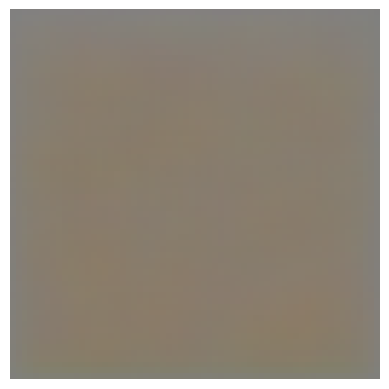

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import BinaryCrossentropy, MeanSquaredError
from tensorflow.keras.metrics import BinaryAccuracy
import numpy as np
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

from tensorflow.keras import mixed_precision

mixed_precision.set_global_policy('mixed_float16')

# Set parameters
img_shape = (64, 64, 3)
z_dim = 64  # Increased noise vector dimension
num_emotions = len(set([label for label in ds['train']['emotion']]))  # Number of emotion labels
batch_size = 16
epochs = 200  # Increased the number of epochs

# Preprocess the dataset
def preprocess_data(sample):
    image = tf.image.resize(sample['image'], (64, 64)) / 255.0  # Normalize images
    emotion_label = to_categorical(sample['emotion'], num_emotions)
    return {'image': image, 'emotion': emotion_label}

train_data = ds['train'].map(preprocess_data).with_format("tensorflow").to_tf_dataset(
    columns=['image', 'emotion'],
    shuffle=True,
    batch_size=batch_size
)
train_data = train_data.prefetch(tf.data.experimental.AUTOTUNE)  # Apply prefetch to the batched dataset

# Build the generator model
def build_generator(z_dim, num_emotions):
     model = Sequential([
        layers.Input(shape=(z_dim + num_emotions,)),
        layers.Dense(8 * 8 * 256),
        layers.LeakyReLU(0.2),
        layers.Reshape((8, 8, 256)),

        # Upsampling blocks
        layers.UpSampling2D(),
        layers.Conv2D(128, kernel_size=5, padding="same"),
        layers.LeakyReLU(0.2),

        layers.UpSampling2D(),
        layers.Conv2D(128, kernel_size=5, padding="same"),
        layers.LeakyReLU(0.2),

        layers.UpSampling2D(),
        layers.Conv2D(64, kernel_size=5, padding="same"),
        layers.LeakyReLU(0.2),

        # Output layer
        layers.Conv2D(3, kernel_size=4, padding="same", activation="sigmoid", dtype="float32")])
     return model

# Build the generator
generator = build_generator(z_dim, num_emotions)

# Compile the generator with Binary Cross-Entropy loss
generator.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.002))


def generate_image(emotion_index):
    noise = tf.random.normal([1, z_dim])
    emotion_label = to_categorical([emotion_index], num_emotions)
    combined_input = tf.concat([noise, emotion_label], axis=1)
    generated_image = generator.predict(combined_input)
    return np.clip(generated_image[0], 0, 1)


# Training the generator
for epoch in range(epochs):
    epoch_loss = []
    for batch in train_data:
        # Generate random noise
        real_images = batch['image']
        emotion_labels = batch['emotion']

        batch_size = real_images.shape[0]
        noise = tf.random.normal([batch_size, z_dim])
        combined_input = tf.concat([noise, emotion_labels], axis=1)


        # Calculate the loss
        loss = generator.train_on_batch(combined_input, real_images)
        epoch_loss.append(loss)

    avg_loss=np.mean(epoch_loss)

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")

    # Save and visualize a generated image every 10 epochs
    if epoch % 10 == 0:
        sample_image = generate_image(emotion_index=1)  # You can change the emotion index here
        plt.imshow(sample_image)
        plt.axis('off')
        plt.show()

# After training, save the generator model
generator.save("/content/drive/MyDrive/Colab/emotion_based_image_generator.h5")

In [ ]:
emotion_index = 1  # Replace with an index corresponding to a specific emotion
generated_image = generate_image(emotion_index)

# Display the generated image
plt.imshow(generated_image)
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


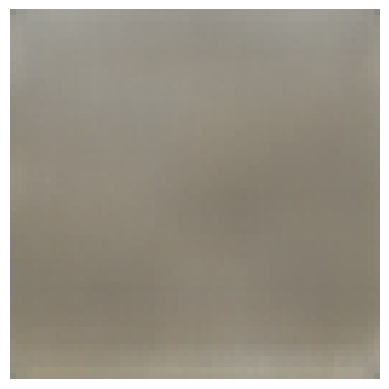

In [ ]:
# Example: Generate an image for a given emotion label
def generate_image(emotion_index):
    noise = tf.random.normal([1, z_dim])
    emotion_label = to_categorical([emotion_index], num_emotions)
    generated_image = generator.predict([noise, emotion_label])
    return generated_image[0]

# Display a generated image for an example emotion
emotion_index = 5  # Replace with an index corresponding to a specific emotion
generated_image = generate_image(emotion_index)

# Plotting the generated image
import matplotlib.pyplot as plt
plt.imshow(generated_image)
plt.axis('off')
plt.show()
